In [ ]:
!gdown --id 1TEbtPs26GNS0C7Tnua_CCm5dO5DQf39z

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TEbtPs26GNS0C7Tnua_CCm5dO5DQf39z
To: /content/archive.zip
100% 126M/126M [00:03<00:00, 39.5MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/archive.zip','r') as zipf:
     zipf.extractall()

In [ ]:
train_data_dir='/content/images/train'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, zoom_range=0.3)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224,224),
    batch_size=13,
    class_mode='sparse')

Found 28821 images belonging to 7 classes.


In [ ]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
c1=hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4", input_shape=(224,224,3))
model1 =  tf.keras.models.Sequential([c1,tf.keras.layers.Dense(7,activation="softmax")])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 10)                17930     
                                                                 
Total params: 4,381,642
Trainable params: 17,930
Non-trainable params: 4,363,712
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1792)              4363712   
                                                                 
 dense (Dense)               (None, 7)                 12551     
                                                                 
Total params: 4,376,263
Trainable params: 12,551
Non-trainable params: 4,363,712
_________________________________________________________________


In [ ]:
model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [ ]:
model1.fit(train_generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2217/2217 [==============================] - 375s 163ms/step - loss: 1.5751 - acc: 0.4064
Epoch 2/5
2217/2217 [==============================] - 357s 161ms/step - loss: 1.4741 - acc: 0.4508
Epoch 3/5
2217/2217 [==============================] - 356s 161ms/step - loss: 1.4444 - acc: 0.4602
Epoch 4/5
2217/2217 [==============================] - 356s 161ms/step - loss: 1.4174 - acc: 0.4710
Epoch 5/5
2217/2217 [==============================] - 358s 162ms/step - loss: 1.4127 - acc: 0.4787


In [ ]:
mkdir faceapp

In [ ]:
model1.save('faceapp/')

In [ ]:
import numpy as np
import os

In [ ]:
cd /content/DATA/TEST

/content/DATA/TEST


In [ ]:
image_name=[]
prediction=[]
for item in os.listdir():
    #print(item)
    image = tf.keras.preprocessing.image.load_img(item,target_size=(224,224))
    input_arr =tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])*(1./255)
    predict=model1.predict(input_arr)
    predict=np.argmax(np.round(predict),axis=1)
    image_name.append(item)
    prediction.append(name[predict[0]])

In [ ]:
cd /content

/content


In [ ]:
!zip -r faceapp.zip faceapp


  adding: faceapp/ (stored 0%)
  adding: faceapp/keras_metadata.pb (deflated 80%)
  adding: faceapp/fingerprint.pb (stored 0%)
  adding: faceapp/assets/ (stored 0%)
  adding: faceapp/saved_model.pb (deflated 92%)
  adding: faceapp/variables/ (stored 0%)
  adding: faceapp/variables/variables.index (deflated 78%)
  adding: faceapp/variables/variables.data-00000-of-00001 (deflated 7%)


In [ ]:
['angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'sad',
 'surprise']

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

# Load the pre-trained Haar cascade face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the image file
img = cv2.imread('/content/download.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw a rectangle around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cp_img=img[y:y+h, x:x+w]
print(len(faces))
# Display the image with detected faces
cv2_imshow(cp_img)

In [ ]:
!git clone https://github.com/oarriaga/face_classification.git

Cloning into 'face_classification'...
remote: Enumerating objects: 996, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 996 (delta 5), reused 3 (delta 1), pack-reused 984
Receiving objects: 100% (996/996), 121.31 MiB | 12.21 MiB/s, done.
Resolving deltas: 100% (558/558), done.


1/1 [==============================] - 0s 251ms/step


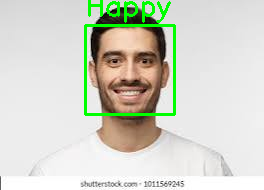

In [ ]:
import cv2
from keras.models import load_model
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained facial expression recognition model
model = load_model('/content/face_classification/trained_models/fer2013_mini_XCEPTION.119-0.65.hdf5')

# Define the emotions labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Read the image file
image = cv2.imread('/content/download.jpg')

# Convert image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Process each detected face
for (x, y, w, h) in faces:
    # Extract face region of interest (ROI)
    face_roi = gray[y:y+h, x:x+w]
    face_roi = cv2.resize(face_roi, (48, 48))
    face_roi = face_roi.astype("float") / 255.0
    face_roi = np.expand_dims(face_roi, axis=0)
    face_roi = np.expand_dims(face_roi, axis=-1)

    # Perform emotion prediction
    emotion_prediction = model.predict(face_roi)[0]
    emotion_label = emotion_labels[np.argmax(emotion_prediction)]

    # Draw bounding box and emotion label
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the resulting image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
